# 2-Regression-Pırlanta Fiyat Analizi

Bu projenin amacı, elmasların fiyatlarını analiz etmek için veri bilimi ve veri analitiği tekniklerini kullanarak elmasların özelliklerine göre fiyatlarını tahmin etmektir. Aşağıda bu projenin adımlarını ve yapılacakları adım adım açıklayabilirim:

1. **Veri Edinme**: İlk adım, Kaggle veya başka bir kaynaktan elmaslarla ilgili bir veri kümesi edinmektir. Bu veri kümesi, elmasların özelliklerini (Carat, Cut, Colour, Clarity, Depth, Table gibi) ve fiyatlarını içermelidir.

2. **Veri Keşfi**: Veri kümenizi inceleyerek, eksik verileri doldurun, verileri temizleyin ve anlamlı istatistiksel özetler çıkarın. Hangi özelliklerin fiyatı en çok etkilediğini belirlemek için veriye genel bir bakış atın.

3. **Veri Görselleştirme**: Verileri görselleştirerek elmas özellikleri ile fiyat arasındaki ilişkileri daha iyi anlayın. Örneğin, karat ile fiyat arasındaki ilişkiyi bir scatter plot ile görselleştirebilirsiniz. Ayrıca kategorik özelliklerin (Cut, Colour, Clarity) fiyat üzerindeki etkisini incelemek için bar grafikleri veya kutu grafikleri kullanabilirsiniz.

4. **Veri Ön İşleme**: Modelinize veri hazırlığı yapın. Bu, özellik mühendisliği, kategorik verilerin dönüştürülmesi, veri normalleştirme ve eğitim/test veri kümesi ayrımını içerir.

5. **Model Seçimi**: Verilerinize en uygun modeli seçin. Elmas fiyat tahmini için kullanabileceğiniz birkaç model türü vardır, örneğin lineer regresyon, karar ağaçları, rastgele ormanlar veya derin öğrenme modelleri (örneğin yapay sinir ağları).

6. **Model Eğitimi**: Seçtiğiniz modeli eğitmek için eğitim veri kümenizi kullanın. Modelinizi eğitirken, hiperparametre ayarlaması ve aşırı uydurmayı önlemek için uygun regülasyon tekniklerini kullanmayı unutmayın.

7. **Model Değerlendirmesi**: Eğitilen modelin performansını değerlendirin. Bu, R-kare, ortalama kare hata (MSE), ortalama mutlak hata (MAE) gibi metriklerle yapılabilir. Ayrıca, modelinizi test veri kümesi üzerinde test ederek genelleme yeteneğini değerlendirin.

8. **Model İyileştirmesi**: Modelinizin performansını artırmak için hiperparametreleri ayarlayabilir veya özellik mühendisliği teknikleri uygulayabilirsiniz.

9. **Sonuçların İletilmesi**: Sonuçlarınızı anlamak ve yorumlamak için elmas fiyatlarını etkileyen özellikleri inceleyin. Hangi özelliklerin fiyatı en çok etkilediğini ve bu özellikler arasındaki ilişkileri anlatın.

10. **Raporlama ve Görselleştirme**: Projeyi raporlayın ve sonuçları açıklayıcı grafikler ve metin ile sunun. Elde ettiğiniz bulguları paylaşın ve projenin sonuçlarını paydaşlara sunun.

<img src= "diamond.jpg">

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

## 2. **Veri Keşfi**:

In [2]:
df=pd.read_csv("diamonds.csv")

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Veri içindeki sutun bilgileri:
1. **carat**: Elmasın ağırlığı karat cinsinden ölçülmüştür. Karat, elmasın büyüklüğünün bir göstergesidir. Genellikle büyük karatlı elmaslar daha değerlidir.

2. **cut**: Elmasın kesimi veya işlenmesi hakkında bilgi veren bir sütundur. Elmaslar genellikle "Ideal," "Premium," "Good," "Very Good," veya "Fair" gibi kesim kalitelerine sahiptir. Bu, elmasın parlaklığı ve estetiği üzerinde büyük bir etkiye sahip olabilir.

3. **color**: Elmasın renk derecesini belirtir. Renk, harf sınıflandırmaları kullanılarak ifade edilir, başlangıçta "D" (renksiz) ile başlayıp "Z" (zayıf renkli) ile sona erer. "D" rengindeki elmaslar en renksiz ve genellikle en değerli olanlardır.

4. **clarity**: Elmasın berraklığını belirtir. Bu sütun, içindeki veya üzerindeki içeriklerin ve kusurların derecesini ifade eder. Örnekler arasında "SI1" (küçük içerikler) ve "VS2" (çok küçük içerikler) gibi değerler bulunur.

5. **depth**: Elmasın derinliğini yüzde cinsinden ifade eder. Derinlik, elmasın yüzey ve altını ölçer ve parlaklığını etkileyebilir.

6. **table**: Elmasın üst yüzeyinin genişliği yüzde cinsinden ifade eder. Bu, elmasın kesimi ve dengeyi etkileyebilir.

7. **price**: Elmasın fiyatı dolar cinsinden verilmiştir. Bu, elmasın değerini ifade eder.

8. **x**: Elmasın uzunluğu milimetre cinsinden verilmiştir.

9. **y**: Elmasın genişliği milimetre cinsinden verilmiştir.

10. **z**: Elmasın derinliği milimetre cinsinden verilmiştir.

In [6]:
df.shape

(53940, 11)

In [8]:
df["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

1. **Ideal**: Bu kesim kalitesi, elmasların en yüksek kesim kalitesine sahip olduğunu temsil eder. "Ideal" kesimli elmaslar, en iyi parlaklığa ve estetiğe sahiptir. Genellikle en değerli olanlarıdır.

2. **Premium**: "Premium" kesimli elmaslar, kesim kalitesi açısından yüksek bir seviyede bulunur. Bu elmaslar da oldukça parlak ve estetiktir ve genellikle yüksek değerlidir.

3. **Very Good**: "Very Good" kesimli elmaslar, kesim kalitesi açısından oldukça iyi bir seviyededir. Parlak ve estetik açıdan tatmin edici seviyede bulunurlar.

4. **Good**: "Good" kesimli elmaslar, kesim kalitesi olarak daha düşük bir seviyededir, ancak hala tatmin edici bir parlaklık ve estetik sunabilirler.

5. **Fair**: "Fair" kesimli elmaslar, kesim kalitesi açısından en düşük seviyededir. Parlaklık ve estetik açıdan diğer kategorilere göre daha düşüktürler ve genellikle daha düşük değere sahiptirler.

Bu sıralama, elmasların kesim kalitesini temsil eder ve kesim kalitesi genellikle elmasın dış görünüşü ve parlaklığı üzerinde büyük bir etkiye sahiptir. Kesim kalitesi, elmasın nasıl parladığı ve estetik görüntüsü üzerinde büyük bir etkiye sahip olduğundan, değerlendirme ve fiyatlandırmada önemli bir faktördür.

In [10]:
df["clarity"].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

Bu değerler, elmasların "clarity" (berraklık) sütununda bulunan farklı berraklık derecelerini temsil eder. İşte bu berraklık derecelerinin açıklamaları:

1. **SI1**: Slightly Included 1 (Hafifçe Dahil 1) - Bu derece, elmasın içinde çok küçük içeriklerin veya kusurların olduğunu belirtir. Genellikle çıplak gözle zor görülürler ve elmasın parlaklığına büyük bir etkisi olmayabilir.

2. **VS2**: Very Slightly Included 2 (Çok Hafifçe Dahil 2) - VS2 derecesi, SI1'e göre daha az içerik veya kusur içeren elmasları temsil eder. Bu elmaslar genellikle daha temizdir.

3. **SI2**: Slightly Included 2 (Hafifçe Dahil 2) - SI2 derecesi, SI1'e göre daha fazla içerik veya kusur içeren elmasları ifade eder. Bu derece altındaki elmaslar daha düşük bir berraklığa sahiptir.

4. **VS1**: Very Slightly Included 1 (Çok Hafifçe Dahil 1) - VS1, VS2'den daha yüksek bir berraklık derecesini temsil eder. Bu elmaslar daha temizdir ve içerik veya kusur daha az görünürdür.

5. **VVS2**: Very Very Slightly Included 2 (Çok Çok Hafifçe Dahil 2) - VVS2 derecesi, elmasın içerdiği içerik veya kusurların çok zor görünür olduğunu belirtir. Bu elmaslar genellikle oldukça temizdir.

6. **VVS1**: Very Very Slightly Included 1 (Çok Çok Hafifçe Dahil 1) - VVS1, VVS2'den daha yüksek bir berraklık derecesini temsil eder. Bu elmaslar, içerik veya kusurları daha az görünürdür ve daha yüksek bir berraklığa sahiptir.

7. **IF**: Internally Flawless (İçsel Kusursuz) - IF derecesi, elmasın içinde herhangi bir içerik veya kusur olmadığını belirtir. Bu elmaslar en yüksek berraklık derecesine sahiptir.

8. **I1**: Included 1 (Dahil 1) - I1 derecesi, elmasın içinde büyük ve gözle rahatça görülebilen içerik veya kusurların olduğunu ifade eder. Bu derece altındaki elmaslar daha düşük bir berraklığa sahiptir ve genellikle daha düşük değerlidir.
Ayrıca:
**Elmasların berraklık derecelerini en iyiden en kötüye doğru:**

IF (İçsel Kusursuz) - İçsel kusursuzluğa sahip en yüksek berraklık derecesi.
VVS1 (Çok Çok Hafifçe Dahil 1) - Çok çok hafif dahil içeriklere sahip.
VVS2 (Çok Çok Hafifçe Dahil 2) - VVS1'e göre biraz daha içerik içerebilir.
VS1 (Çok Hafifçe Dahil 1) - Çok hafif dahil içeriklere sahip.
VS2 (Çok Hafifçe Dahil 2) - VS1'e göre biraz daha içerik içerebilir.
SI1 (Hafifçe Dahil 1) - Hafifçe dahil içeriklere sahip.
SI2 (Hafifçe Dahil 2) - SI1'e göre biraz daha fazla içerik içerebilir.
I1 (Dahil 1) - Dahil içeriklere sahip, en düşük berraklık derecesi.

In [20]:
df["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

Bu değerler, elmasların "color" (renk) sütununda bulunan farklı renk derecelerinin sayısını temsil eder. Renk dereceleri, genellikle başlangıçta "D" ile başlayan renksizden (colorless) "Z" ile biten hafif renkliye (light color) kadar sıralanır. İşte bu renk derecelerinin açıklamaları:

- **D**: Renksiz (Colorless) - "D" derecesi, en yüksek renk kalitesine sahip elmasları temsil eder. Bu elmaslar renksizdir ve genellikle en değerli olanlardır.

- **E**: Renksiz (Colorless) - "E" derecesi, yine renksiz elmasları temsil eder. "D" derecesine çok yakın bir renksizlik seviyesine sahiptir.

- **F**: Renksiz (Colorless) - "F" derecesi, yine renksiz elmasları temsil eder. "D" ve "E" derecelerine yakın bir renksizlik seviyesine sahiptir.

- **G**: Hafif Renkli (Near Colorless) - "G" derecesi, hafif renkli olarak kabul edilir, ancak renk farkı çıplak gözle zor fark edilir. Bu derece genellikle değerlidir.

- **H**: Hafif Renkli (Near Colorless) - "H" derecesi, hafif renkli bir elması temsil eder. Renk farkı yavaşça algılanabilir hale gelir.

- **I**: Hafif Renkli (Near Colorless) - "I" derecesi, hafif renkli elmasları temsil eder. Renk farkı daha belirgin hale gelir.

- **J**: Hafif Renkli (Near Colorless) - "J" derecesi, hafif renkli bir elmayı ifade eder ve renk farkı daha belirgindir.

Bu renk dereceleri, elmasların içerdikleri renk tonunu ve berraklığını tanımlar. Genellikle "D" renk derecesine sahip olanlar, en renksiz ve en değerli olanlar olarak kabul edilirken, "J" derecesine sahip olanlar daha belirgin bir renge sahip olabilir ve genellikle daha düşük fiyatlıdır.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [4]:
# Tüm sütunların price sutununa korelasyonunu hesaplama
p_corr= df.corr()['price'].sort_values(ascending=False)
# Korelasyonları büyükten küçüğe sıralama
print(p_corr)

price         1.000000
carat         0.921591
x             0.884435
y             0.865421
z             0.861249
table         0.127134
depth        -0.010647
Unnamed: 0   -0.306873
Name: price, dtype: float64


## 3. **Veri Görselleştirme**:

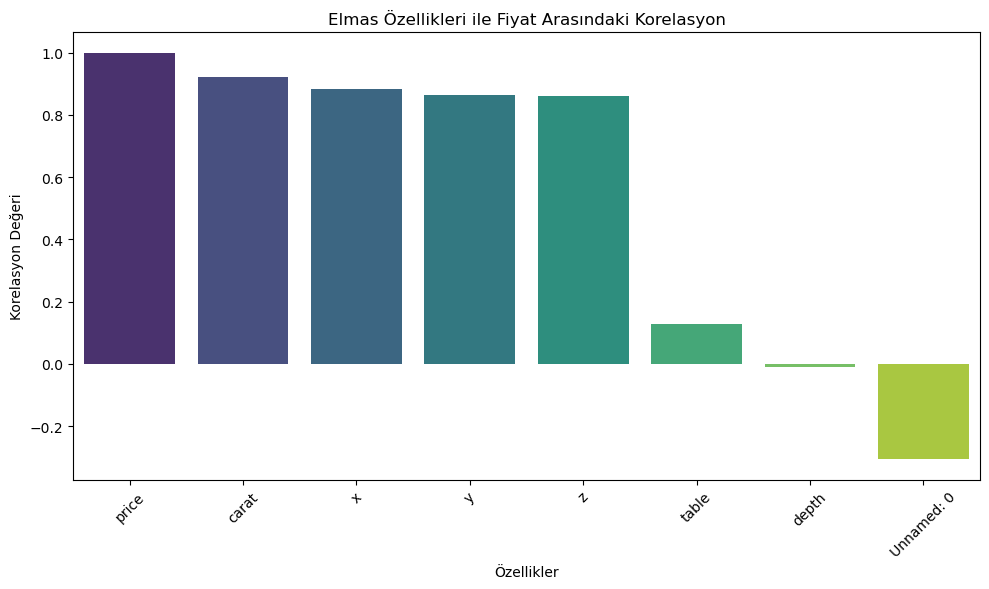

In [11]:
# Grafiği oluşturma
plt.figure(figsize=(10, 6))
sns.barplot(x=p_corr.index, y=p_corr.values, palette="viridis")
plt.title('Elmas Özellikleri ile Fiyat Arasındaki Korelasyon')
plt.xlabel('Özellikler')
plt.ylabel('Korelasyon Değeri')
plt.xticks(rotation=45)
plt.tight_layout()

# Grafiği gösterme
plt.show()

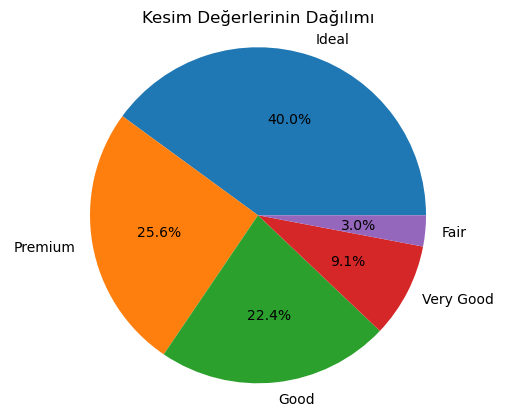

In [13]:
plt.pie(x=df['cut'].value_counts(), labels=df["cut"].unique(), autopct='%1.1f%%')
plt.axis('equal')  # Dairesel bir pasta grafiği oluşturmak için bu satırı ekleyin
plt.title('Kesim Değerlerinin Dağılımı')
plt.show()

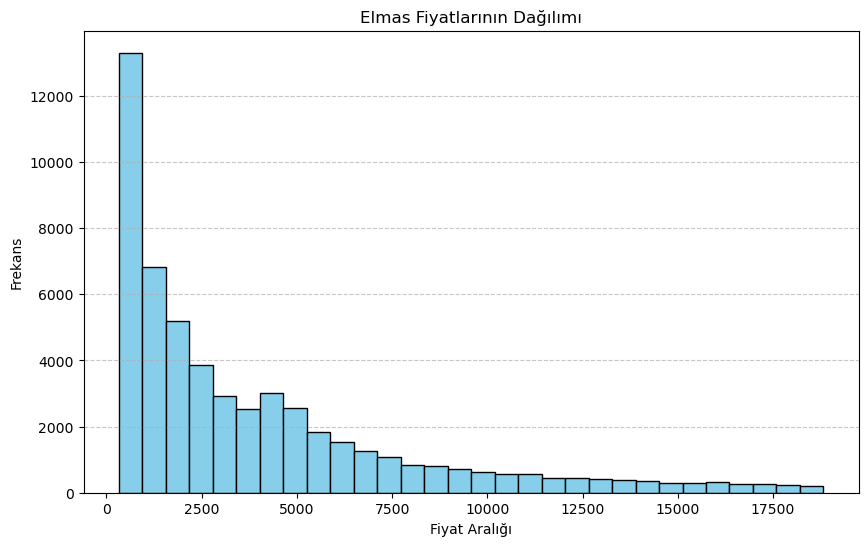

In [14]:
# Histogram oluşturulacak veriyi seçin (örneğin, elmas fiyatları)
diamond_prices = df['price']

# Histogram oluşturma
plt.figure(figsize=(10, 6))
plt.hist(diamond_prices, bins=30, color='skyblue', edgecolor='black')  # bins, çubuk sayısını belirtir

# Grafik ayarları
plt.title('Elmas Fiyatlarının Dağılımı')
plt.xlabel('Fiyat Aralığı')
plt.ylabel('Frekans')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Grafik gösterme
plt.show()

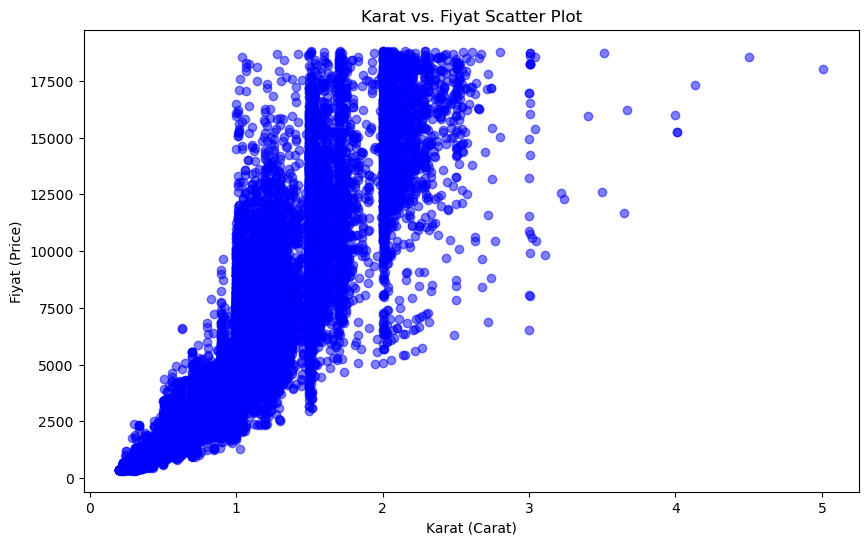

In [15]:
# Karat (carat) ve fiyat (price) verilerini seçin
karat = df['carat']
fiyat = df['price']

# Scatter plot oluşturma
plt.figure(figsize=(10, 6))
plt.scatter(karat, fiyat, alpha=0.5, color='blue')  # alpha, noktaların saydamlığını ayarlar

# Grafik ayarları
plt.title('Karat vs. Fiyat Scatter Plot')
plt.xlabel('Karat (Carat)')
plt.ylabel('Fiyat (Price)')

# Grafik gösterme
plt.show()

## 4. **Veri Ön İşleme(Feature Engineering**:

In [31]:
df1.info() # boşverimiz yok 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    53940 non-null  int64  
 1   carat         53940 non-null  float64
 2   depth         53940 non-null  float64
 3   table         53940 non-null  float64
 4   price         53940 non-null  int64  
 5   volume        53940 non-null  float64
 6   cut_encoded   53940 non-null  int32  
 7   cut1          53940 non-null  int32  
 8   color_E       53940 non-null  uint8  
 9   color_F       53940 non-null  uint8  
 10  color_G       53940 non-null  uint8  
 11  color_H       53940 non-null  uint8  
 12  color_I       53940 non-null  uint8  
 13  color_J       53940 non-null  uint8  
 14  clarity_IF    53940 non-null  uint8  
 15  clarity_SI1   53940 non-null  uint8  
 16  clarity_SI2   53940 non-null  uint8  
 17  clarity_VS1   53940 non-null  uint8  
 18  clarity_VS2   53940 non-nu

In [22]:
# Elmasın boyutlarını içeren veriyi seçin
x = df['x']
y = df['y']
z = df['z']

# Elmasın hacmini hesaplayın (x * y * z)
df['volume'] = x * y * z

# Yeni sütunu inceleyin
print(df.head())

   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z     volume  
0  2.43  38.202030  
1  2.31  34.505856  
2  2.31  38.076885  
3  2.63  46.724580  
4  2.75  51.917250  


In [24]:
#Volume aktardığımız için bunları kaldırabiliriz
df.drop(['x', 'y', 'z'], axis=1, inplace=True)

In [27]:
# obje üç sutunumuzu sayısal değerlere dönüştüreceğiz
# Kesimine göre bir hiyerarşi olduğu için Label Encoding yapabiliriz
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['cut1'] = label_encoder.fit_transform(df['cut'])

In [28]:
# diğer ikisi içinde get_dummies
df1 = pd.get_dummies(df, columns=['color', 'clarity'], drop_first=True)

In [30]:
df1.drop(["cut"], axis=1, inplace=True)

In [34]:
p_corr= df1.corr()['price'].sort_values(ascending=False)
print(p_corr)

price           1.000000
carat           0.921591
volume          0.902385
clarity_SI2     0.128420
table           0.127134
color_I         0.097125
color_J         0.081710
color_H         0.059223
cut_encoded     0.039860
cut1            0.039860
clarity_SI1     0.008957
color_G         0.008556
clarity_VS2    -0.001062
clarity_VS1    -0.009886
depth          -0.010647
color_F        -0.024161
clarity_IF     -0.049596
clarity_VVS2   -0.052381
clarity_VVS1   -0.095266
color_E        -0.101089
Unnamed: 0     -0.306873
Name: price, dtype: float64


## Modelleme
-5. **Model Seçimi**:
-6. **Model Eğitimi**:
-7. **Model Değerlendirmesi**:
-8. **Model İyileştirmesi**:

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [35]:
x = df1[['carat', 'volume']]
y = df1['price']

In [36]:
def fnc_all_regression_models(x,y):
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import Ridge,Lasso
    from sklearn.linear_model import ElasticNet
    from sklearn.tree import ExtraTreeRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.neighbors import KNeighborsRegressor
    
    from sklearn.model_selection import train_test_split

    from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
    
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ExTree=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    KN=KNeighborsRegressor()
    
    algos=[L,R,Lass,E,ExTree,GBR,KN]
    algo_names=['LinearRegression','Ridge','Lasso','ElasticNet','ExtraTreeRegressor','GradientBoostingRegressor','KNeighborsRegressor']
    r_squared=[]
    rmse=[]
    mae=[]
    
    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        r_squared.append(r2_score(y_test,item.predict(x_test)))
        rmse.append((mean_squared_error(y_test,item.predict(x_test)))**.5)
        mae.append(mean_absolute_error(y_test,item.predict(x_test)))
        
    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae
        
    return result.sort_values('R_Squared',ascending=False)

In [37]:
fnc_all_regression_models(x,y)

,R_Squared,RMSE,MAE
GradientBoostingRegressor,0.878109,1392.004852,799.634094
KNeighborsRegressor,0.859249,1495.827556,851.746719
ElasticNet,0.850898,1539.561807,967.142604
Lasso,0.849265,1547.968951,1008.295109
Ridge,0.849222,1548.187925,1008.706566
LinearRegression,0.849211,1548.243965,1008.810971
ExtraTreeRegressor,0.812435,1726.754196,877.282770


In [39]:
## Deep Learning
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Veri hazırlığı ve normalleştirme
X = df1[['carat', 'volume']]
y = df1['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Yapay sinir ağı modelini oluşturma
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(2,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

# Modeli derleme
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Modeli eğitme
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

# Modeli test verileriyle değerlendirme
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

Epoch 1/30
1079/1079 [==============================] - 2s 2ms/step - loss: 17566570.0000 - mae: 2535.5046 - val_loss: 2270815.0000 - val_mae: 866.9815
Epoch 2/30
1079/1079 [==============================] - 2s 1ms/step - loss: 2511032.7500 - mae: 869.8041 - val_loss: 2185757.7500 - val_mae: 856.8775
Epoch 3/30
1079/1079 [==============================] - 2s 1ms/step - loss: 2479626.7500 - mae: 860.2899 - val_loss: 2178279.2500 - val_mae: 856.4216
Epoch 4/30
1079/1079 [==============================] - 2s 1ms/step - loss: 2456279.0000 - mae: 856.0323 - val_loss: 2177046.5000 - val_mae: 848.3627
Epoch 5/30
1079/1079 [==============================] - 2s 1ms/step - loss: 2439562.7500 - mae: 851.9706 - val_loss: 2174708.0000 - val_mae: 847.3158
Epoch 6/30
1079/1079 [==============================] - 2s 2ms/step - loss: 2418843.5000 - mae: 850.6108 - val_loss: 2170676.2500 - val_mae: 848.6746
Epoch 7/30
1079/1079 [==============================] - 2s 1ms/step - loss: 2402278.0000 - mae: 84

Epoch 1/50
1079/1079 [==============================] - 2s 2ms/step - loss: 2239998.7500 - mae: 839.4947 - val_loss: 2162317.0000 - val_mae: 838.1417
Epoch 2/50
1079/1079 [==============================] - 2s 2ms/step - loss: 2238494.2500 - mae: 839.1339 - val_loss: 2162400.0000 - val_mae: 835.3385
Epoch 3/50
1079/1079 [==============================] - 2s 1ms/step - loss: 2235768.2500 - mae: 839.4789 - val_loss: 2161387.7500 - val_mae: 835.6985
Epoch 4/50
1079/1079 [==============================] - 2s 2ms/step - loss: 2232683.0000 - mae: 837.9113 - val_loss: 2172670.5000 - val_mae: 833.1937
Epoch 5/50
1079/1079 [==============================] - 2s 1ms/step - loss: 2233430.7500 - mae: 839.6688 - val_loss: 2161401.0000 - val_mae: 835.8467
Epoch 6/50
1079/1079 [==============================] - 2s 2ms/step - loss: 2230527.5000 - mae: 838.1748 - val_loss: 2161197.5000 - val_mae: 839.8319
Epoch 7/50
1079/1079 [==============================] - 2s 2ms/step - loss: 2226261.2500 - mae: 839.

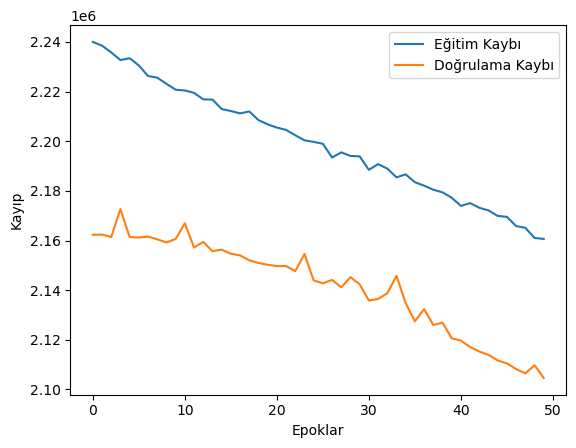

In [40]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


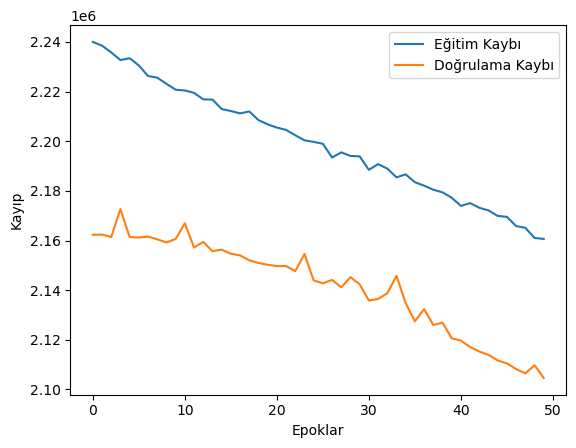

In [43]:
# Eğitim ve doğrulama kaybını çizin
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoklar')
plt.ylabel('Kayıp')
plt.legend()
plt.show()

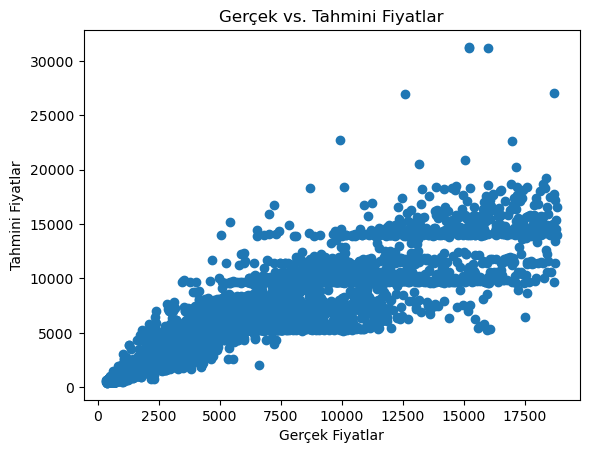

In [41]:
# Gerçek ve tahmini fiyatları karşılaştırma
plt.scatter(y_test, y_pred)
plt.xlabel('Gerçek Fiyatlar')
plt.ylabel('Tahmini Fiyatlar')
plt.title('Gerçek vs. Tahmini Fiyatlar')
plt.show()

Gerçek ve Tahmini Fiyatların Karşılaştırılması:
Gerçek fiyatlar ile modelinizin tahmin ettiği fiyatları karşılaştırmak için bir grafik oluşturabilirsiniz.

## Sonuç

 Derin öğrenme modeli, elmasların fiyat tahmininde başarılı bir şekilde kullanıldı ve belirli özelliklere sahip bir elmasın fiyatını tahmin etmek için etkili bir araç olarak gösterildi.

 Modelin tahminleri, carat (kütle) ve volume (hacim) gibi önemli özelliklerin elmas fiyatları üzerindeki etkisini yakından takip ederek, değerli taşların fiyatlarını doğru bir şekilde tahmin etmekte kullanıldı.

 Elde edilen sonuçlar, derin öğrenme yöntemlerinin karmaşık veri yapılarını işlemedeki yeteneğini ve elmas fiyatlarının tahmin edilmesi gibi regresyon problemlerindeki uygulanabilirliğini göstermektedir.

 Model, müşterilere veya elmas satıcılarına, belirli özelliklere sahip elmasların fiyatlarını daha doğru bir şekilde tahmin etme konusunda yardımcı olabilir, bu da pazarlama ve ticaret stratejilerini optimize etme fırsatları sunabilir.